In [1]:
# Moment accountant
# Last Update: 01/18/2022 by Fei Wei

In [9]:
import os
os.getcwd()

'/Users/weifei/Documents/Codes/python_fei'

l1 cost = 3.191458488001366
l2 cost = 15.999599999999864


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


FileNotFoundError: [Errno 2] No such file or directory: '/home/fwei16/privacy_plots/GaussianComparisonL2.eps'

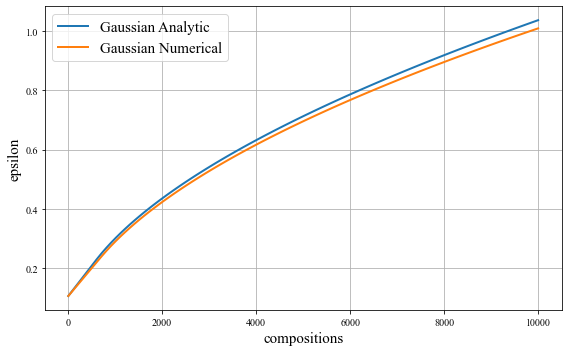

In [2]:
'''
Testing, we compare the numerical integrated rdp with the analytic rdp in TF-privacy, when q=1, they suppose to be the same.
'''
from compute_rdp_general import compute_rdp_general
from compute_rdp_general import compute_delta
from compute_rdp_general import compute_epsilon

from tensorflow_privacy.privacy.analysis.rdp_accountant import compute_rdp
from tensorflow_privacy.privacy.analysis.rdp_accountant import get_privacy_spent

import numpy as np
import matplotlib.pyplot as plt

orders = [1 + x / 10. for x in range(1, 600)]
iter_grid = np.linspace(1,10000,100)
C = 16
c_type="l2"
sampling_probability = 0.01
delta = 1e-5
sen = 1;
noise_type="gaussian"

rdp_g = compute_rdp(q=sampling_probability,
                    noise_multiplier=np.sqrt(C),
                    steps=1,
                    orders=orders)
rdp_g2 = np.abs(compute_rdp_general(noise_type,orders,c_type,C,sen,sampling_probability))

eps_grid_g=[]
eps_grid_g2=[]

for iteration in iter_grid:
    eps_grid_g.append(compute_epsilon(iteration,orders,rdp_g,delta))
    eps_grid_g2.append(compute_epsilon(iteration,orders,rdp_g2,delta))   
  
plt.figure(figsize=(8,5))
plt.plot(iter_grid, eps_grid_g,label = ("Gaussian Analytic"),linewidth=2)
plt.plot(iter_grid, eps_grid_g2,label = ("Gaussian Numerical"),linewidth=2)
plt.xlabel("compositions",fontsize=15)
plt.ylabel("epsilon",fontsize=15)
# plt.title("delta = %.e, %s-cost = %.2f, q =%.2f" %(delta,c_type,C,sampling_probability),fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.tight_layout()
plt.grid()
plt.savefig('/Users/weifei/Documents/Codes/python_fei/privacy_plots/GaussianComparisonL2.eps', format='eps')

compute moments for gaussian
l1 cost = 0.252288441442412
l2 cost = 0.0999899999999998
compute moments for cactus
l1 cost = 0.18906072035657617
l2 cost = 0.09999836580861962


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


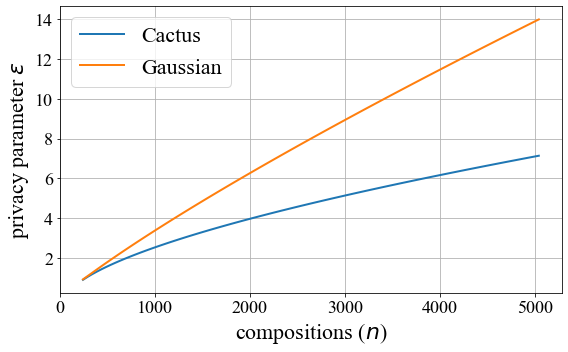

In [2]:
from compute_rdp_general import compute_rdp_general
from compute_rdp_general import compute_delta
from compute_rdp_general import compute_epsilon

from tensorflow_privacy.privacy.analysis.rdp_accountant import compute_rdp
from tensorflow_privacy.privacy.analysis.rdp_accountant import get_privacy_spent

import numpy as np
import matplotlib.pyplot as plt

orders = [1 + x / 10. for x in range(1, 640)]

iter_grid = np.linspace(1,21,20)*240
sampling_probability = 250.0/60000
sen = 1;
delta = 1e-5
C=0.1
c_type="l2"

# iter_grid = np.linspace(1,11,10)
# sampling_probability = 1
# sen = 1;
# delta = 1e-3
# C=0.1
# c_type="l2"

# iter_grid = np.linspace(1,50,20)
# sampling_probability = 1
# delta = 1e-5
# C=0.1
# c_type="l1"

# iter_grid = np.linspace(1,10000)
# sampling_probability = 0.01
# delta = 1e-8
# sen = 0.25;
# C=1
# c_type="l1"
 
if c_type=="l2":
  print("compute moments for gaussian")
  rdp_gaussian = np.abs(compute_rdp_general("gaussian",orders,c_type,C,sen,sampling_probability))
  eps_grid_gaussian=[]

  print("compute moments for cactus")
  rdp_cactus = np.abs(compute_rdp_general("cactus",orders,c_type,C,sen,sampling_probability))
  eps_grid_cactus=[]

if c_type=="l1":
  print("compute moments for laplace")
  rdp_laplace = np.abs(compute_rdp_general("laplace",orders,c_type,C,sen,sampling_probability))
  eps_grid_laplace=[]

  print("compute moments for airy")
  rdp_airy = np.abs(compute_rdp_general("airy",orders,c_type,C,sen,sampling_probability))
  eps_grid_airy=[]

for iteration in iter_grid:
  if c_type=="l2":
    eps_grid_gaussian.append(compute_epsilon(iteration,orders,rdp_gaussian,delta))
    eps_grid_cactus.append(compute_epsilon(iteration,orders,rdp_cactus,delta))
  if c_type=="l1":
    eps_grid_laplace.append(compute_epsilon(iteration,orders,rdp_laplace,delta))
    eps_grid_airy.append(compute_epsilon(iteration,orders,rdp_airy,delta))

plt.figure(figsize=(8,5))
if c_type=="l2":
  plt.plot(iter_grid, eps_grid_cactus,label = ("Cactus"),linewidth=2) 
  plt.plot(iter_grid, eps_grid_gaussian,label = ("Gaussian"),linewidth=2)
if c_type=="l1":
  plt.plot(iter_grid, eps_grid_laplace,label = ("Laplace"),linewidth=2)
  plt.plot(iter_grid, eps_grid_airy,label = ("Airy"),linewidth=2)
plt.xlabel(r"compositions ($n$)",fontsize=22)
plt.xticks(fontsize=18)
plt.ylabel(r"privacy parameter $\epsilon$",fontsize=22)
plt.yticks(fontsize=18)
# plt.title("delta=%.e, %s-cost=%.2f, q=%.2f, sen=%.1f" %(delta,c_type,C,sampling_probability,sen),fontsize=15)
plt.legend(loc='best',fontsize=22)
plt.tight_layout()
plt.grid()
plt.savefig('MA_dlt_%.e_%s_%.2f_q_%.e_sen_%.e.eps' %(delta,c_type,C,sampling_probability,sen), format='eps')
# plt.savefig('MA_dlt_%.e_%s_%.2f_q_%.e_sen_%.e.jpg' %(delta,c_type,C,sampling_probability,sen), dpi=300)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


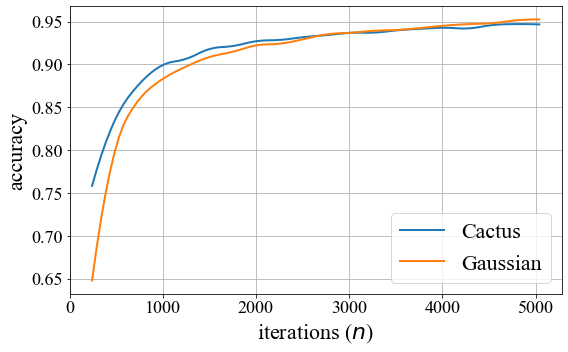

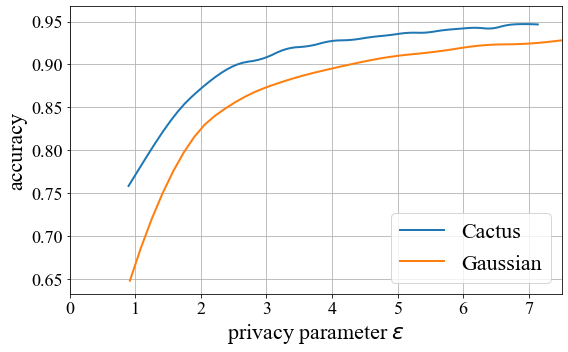

In [6]:
from compute_rdp_general import compute_rdp_general
from compute_rdp_general import compute_delta
from compute_rdp_general import compute_epsilon

from tensorflow_privacy.privacy.analysis.rdp_accountant import compute_rdp
from tensorflow_privacy.privacy.analysis.rdp_accountant import get_privacy_spent

import numpy as np
import matplotlib.pyplot as plt

import csv
import pandas as pd
import scipy
from scipy.interpolate import make_interp_spline, BSpline

sen=1.0
epochs=20
x=np.array(list(range(1,epochs+1)))
variance=0.1

plt.figure(figsize=(8, 5))

filename= ('privacy_data/log_e%d_%d_d%1.1f_v%.2f.csv' %(epochs,2,sen,variance))
acc_cactus = pd.read_csv(filename) 
iter_grid_old = np.linspace(1,epochs+1,epochs)*240
spl = make_interp_spline(iter_grid_old, acc_cactus['val_accuracy'], k=2)
acc_cactus_smooth = spl(iter_grid)
plt.plot(iter_grid,acc_cactus_smooth,label=('Cactus'),linewidth=2)

filename= ('privacy_data/log_e%d_%d_d%1.1f_v%.2f.csv' %(epochs,0,sen,variance))
acc_gaussian = pd.read_csv(filename) 
iter_grid_old = np.linspace(1,epochs+1,epochs)*240
spl = make_interp_spline(iter_grid_old, acc_gaussian['val_accuracy'], k=2)
acc_gaussian_smooth = spl(iter_grid)
plt.plot(iter_grid,acc_gaussian_smooth,label=('Gaussian'),linewidth=2)

plt.xlabel(r'iterations ($n$)',fontsize=22)
plt.xticks(fontsize=18)
plt.ylabel('accuracy',fontsize=22)
plt.yticks(fontsize=18)
# plt.gca().set_ylim([0.7, 0.98])
plt.legend(loc='lower right',fontsize=22)
plt.grid(True)
plt.tight_layout()
plt.savefig('MNIST_GaussianCactus_L2_0.1.eps', format='eps')




plt.figure(figsize=(8, 5))
plt.plot(eps_grid_cactus,acc_cactus_smooth,label=('Cactus'),linewidth=2)
plt.plot(eps_grid_gaussian,acc_gaussian_smooth,label=('Gaussian'),linewidth=2)
plt.xlabel(r'privacy parameter $\epsilon$',fontsize=22)
plt.xticks(fontsize=18)
plt.ylabel('accuracy',fontsize=22)
plt.yticks(fontsize=18)
plt.xlim(0,7.5)
# plt.gca().set_ylim([0.7, 0.98])
plt.legend(loc='best',fontsize=22)
plt.grid(True)
plt.tight_layout()
plt.savefig('MNIST_GaussianCactus_L2_0.1_B.eps', format='eps')


compute moments for gaussian
l1 cost = 0.7978049053408923
l2 cost = 0.999899999999997
compute moments for laplace
l1 cost = 0.7070285935875308
l2 cost = 0.999817052021967
compute moments for cactus


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


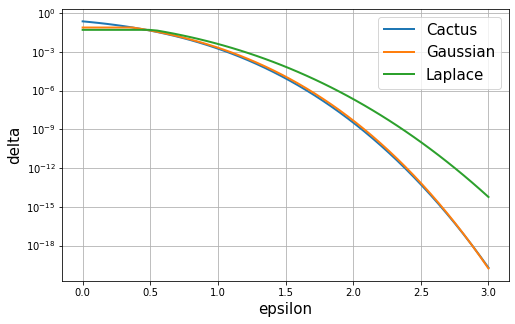

In [24]:
'''
For this cell, we fix the iteration number, and plot the epsilon-delta curve.
'''

from compute_rdp_general import compute_rdp_general
from compute_rdp_general import compute_delta
from compute_rdp_general import compute_epsilon

from tensorflow_privacy.privacy.analysis.rdp_accountant import compute_rdp
from tensorflow_privacy.privacy.analysis.rdp_accountant import get_privacy_spent

import numpy as np
import matplotlib.pyplot as plt

orders = [1 + x / 10. for x in range(1, 1000)]

C = 1.0
c_type="l2"
sampling_probability = 0.01
sen = 1
iteration = 1000
eps_grid=np.linspace(0,3,50)

print("compute moments for gaussian")
rdp_gaussian = np.abs(compute_rdp_general("gaussian",orders,c_type,C,sen,sampling_probability))

print("compute moments for laplace")
rdp_laplace = np.abs(compute_rdp_general("laplace",orders,c_type,C,sen,sampling_probability))

print("compute moments for cactus")
rdp_cactus = np.abs(compute_rdp_general("cactus",orders,c_type,C,sen,sampling_probability))


delta_grid_gaussian=[]
delta_grid_laplace=[]
delta_grid_cactus=[]

for eps in eps_grid:
  delta_grid_gaussian.append(compute_delta(iteration,orders,rdp_gaussian,eps))
  delta_grid_laplace.append(compute_delta(iteration,orders,rdp_laplace,eps))
  delta_grid_cactus.append(compute_delta(iteration,orders,rdp_cactus,eps))

plt.figure(figsize=(8,5))
plt.semilogy(eps_grid, delta_grid_cactus,label = ("Cactus"),linewidth=2)
plt.semilogy(eps_grid, delta_grid_gaussian,label = ("Gaussian"),linewidth=2)
plt.semilogy(eps_grid, delta_grid_laplace,label = ("Laplace"),linewidth=2)
plt.xlabel("epsilon",fontsize=15)
plt.ylabel("delta",fontsize=15)
# plt.title("L2-cost=1.0, q=%.2f, sen=%.1f, iteration=%d" %(sampling_probability,sen,iteration),fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.grid()
plt.tight_layout()
plt.savefig('/home/fwei16/privacy_plots/MA_DltEps_%s_%.1f_q_%.e_sen_%.1f_itr_%d.eps' %(c_type,C,sampling_probability,sen,iteration), format='eps')
# plt.savefig('/home/fwei16/privacy_plots/MA_DltEps_%s_%.1f_q_%.e_sen_%.1f_itr_%d.jpg' %(c_type,C,sampling_probability,c_type,C,sen), dpi=300)


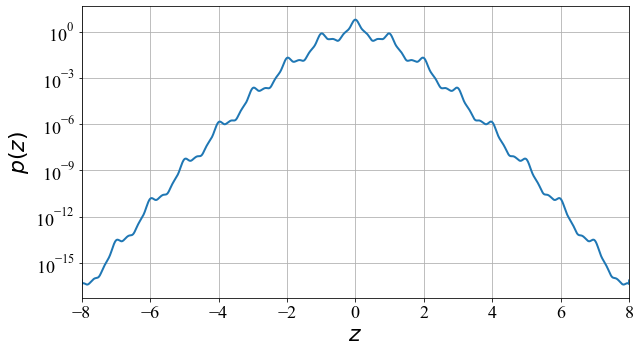

In [16]:
from compute_rdp_general import compute_rdp_general
from compute_rdp_general import compute_delta
from compute_rdp_general import compute_epsilon

from tensorflow_privacy.privacy.analysis.rdp_accountant import compute_rdp
from tensorflow_privacy.privacy.analysis.rdp_accountant import get_privacy_spent

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.special
sen=1
C=0.25
c_type="l2"

def pdfs(noise_type,c_type,C,x):

  if noise_type=="gaussian":
    sigma=np.sqrt(C) if c_type=="l2" else C*np.sqrt(np.pi/2)
    f = lambda x: 1/np.sqrt(2*np.pi)/sigma*np.exp(-x**2/2/sigma**2)

  elif noise_type == "laplace":
    b = np.sqrt(C/2) if c_type=="l2" else C
    f = lambda x:1/2/b*np.exp(-np.abs(x)/b)

  elif noise_type == "airy":
    a0=1.01879
    f = lambda x: np.array(sp.special.airy(2*a0/3/C*np.abs(x)-a0)[0])**2.0/3.0/C/np.array(sp.special.airy(-a0)[0])**2.0
  return f(x)

filename = ('/home/fwei16/privacy_data/cactus_x_d%.1f_%s_%.2f.csv' %(sen,c_type,C))
x_grid = np.genfromtxt(filename, dtype=np.float32)
x_grid = x_grid.reshape(-1)

xmax=max(x)
N=len(x)
n=N/xmax/2

filename = ('/home/fwei16/privacy_data/cactus_p_d%.1f_%s_%.2f.csv' %(sen,c_type,C))
p_cactus = np.genfromtxt(filename, dtype=np.float32)
p_cactus = p_cactus.reshape(len(p_cactus),1)*n

p_gaussian =[pdfs("gaussian",c_type,C,x) for x in x_grid]
p_laplace =[pdfs("laplace",c_type,C,x) for x in x_grid]
p_airy =[pdfs("airy",c_type,C,x) for x in x_grid]

plt.figure(figsize=(9,5))
plt.semilogy(x_grid,p_cactus,linewidth=2)
# plt.plot(x_grid,p_cactus,linewidth=2,label=("Cactus"))
# plt.plot(x_grid,p_gaussian,linewidth=2,label=("Gaussian"))
# plt.plot(x_grid,p_laplace,linewidth=2,label=("Laplace"))
# plt.plot(x_grid,p_airy,linewidth=2,label=("Airy"))
plt.xlabel(r"$z$",fontsize=22)
plt.xticks(fontsize=18)
plt.xlim(-8,8)
plt.ylabel(r"$p(z)$",fontsize=22)
plt.yticks(fontsize=18)
plt.grid()
plt.tight_layout()
plt.savefig('opt_dist_sigma_0.25_2.eps', format='eps')


laplace
l1 cost = 0.9994012712588993
l2 cost = 1.994266301230428
airy
l1 cost = 0.9999015672665917
l2 cost = 1.6253969116726814


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


gaussian
l1 cost = 0.9999001061139167
l2 cost = 1.5706392471620603


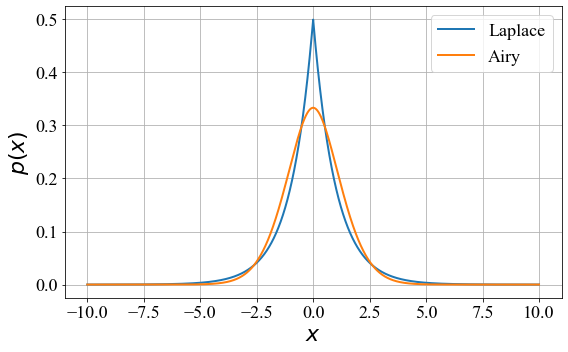

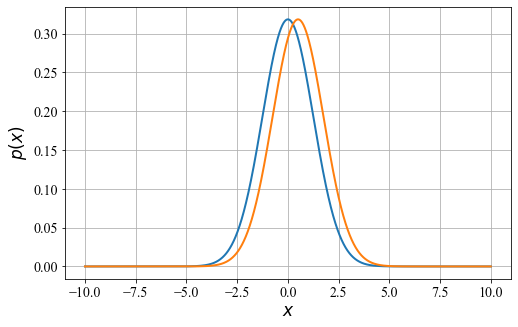

In [12]:
from compute_rdp_general import compute_rdp_general
from compute_rdp_general import compute_delta
from compute_rdp_general import compute_epsilon

from tensorflow_privacy.privacy.analysis.rdp_accountant import compute_rdp
from tensorflow_privacy.privacy.analysis.rdp_accountant import get_privacy_spent

import numpy as np
import scipy as sp
import scipy.special
import matplotlib.pyplot as plt

C=1
sen=1
noise_type="gaussian"
c_type="l1"
q=1

def PandQ(noise_type,C,q,sen):
  n=500.0 # quantization rate
  xmax=max(10,10*np.sqrt(C)) # the domin limit
  x=np.linspace(-xmax, xmax, int(2*xmax*n)) # domain of the distribution

  if noise_type=="gaussian":
    sigma=np.sqrt(C) if c_type=="l2" else C*np.sqrt(np.pi/2)
    f = lambda x: 1/np.sqrt(2*np.pi)/sigma*np.exp(-x**2/2/sigma**2)

  elif noise_type == "laplace":
    b = np.sqrt(C/2) if c_type=="l2" else C
    f = lambda x:1/2/b*np.exp(-np.abs(x)/b)

  elif noise_type == "airy":
    a0=1.01879
    f = lambda x: np.array(sp.special.airy(2*a0/3/C*np.abs(x)-a0)[0])**2.0/3.0/C/np.array(sp.special.airy(-a0)[0])**2.0
    
  print(noise_type)
  ps = np.array([f(X) for X in x])/n
  l1 = sum(ps*np.abs(x))
  print("l1 cost =", l1)
  l2 = sum(ps*np.power(x,2))
  print("l2 cost =", l2)

  qs = q*np.array([f(X) for X in x-sen])/n+(1-q)*ps
  ps= ps.reshape(-1)
  qs = qs.reshape(-1)
  return x,ps,qs

x,ps_laplace=PandQ("laplace",C,q,sen)[0:2]
ps_airy=PandQ("airy",C,q,sen)[1]

plt.figure(figsize=(8,5))
plt.plot(x,ps_laplace*500,linewidth=2,label="Laplace")
plt.plot(x,ps_airy*500,linewidth=2,label="Airy")
plt.xlabel(r"$x$",fontsize=22)
plt.xticks(fontsize=18)
plt.ylabel(r"$p(x)$",fontsize=22)
plt.yticks(fontsize=18)
plt.grid()
plt.legend(loc='best',fontsize=22)
plt.tight_layout()
plt.savefig('AiryLaplace.eps', format='eps')

x,ps,qs=PandQ("gaussian",C,q,0.5)
plt.figure(figsize=(8,5))
plt.plot(x,ps*500,linewidth=2)
plt.plot(x,qs*500,linewidth=2)
plt.xlabel(r"$x$",fontsize=17)
plt.xticks(fontsize=14)
plt.ylabel(r"$p(x)$",fontsize=17)
plt.yticks(fontsize=14)
plt.grid()
